---
Oleh: Zakiul Fahmi Jailani, MSc.

Disampaikan untuk Mahasiswa/i Teknologi Informasi UIN Ar-Raniry Banda Aceh, semester genap tahun 2022.

---
Operasi morfologi adalah operasi yang umum
dapat dilakukan pada sebuah gambar biner (gambar hitam-putih) untuk mengubah struktur bentuk objek yang terkandung dalam gambar tersebut.

Tujuan dari operasi morfologi adalah untuk memperbaiki hasil segmentasi sebuah gambar.

Contoh aplikasi/operasi morfologi:
- Menutup lubang pada gambar
- Memisahkan objek
- Membentuk filter spasial.
- Memperoleh skeleton (rangka) objek.
- Menentukan letak objek di dalam gambar.
- Memperoleh bentuk struktur objek.

![picture](https://drive.google.com/uc?export=view&id=1mYWMrBKEOAlpePnBAOPdKmNOY1urA8G8)

![picture](https://drive.google.com/uc?export=view&id=1mZH-ddJG2_1dNxGMo3zA-duNVMWu4rGN)

![picture](https://drive.google.com/uc?export=view&id=1mZK_7NKWKJKudTRVAJfHZykA2Sys-Fin)

![picture](https://drive.google.com/uc?export=view&id=1mZRGxh6OnXynqZNMSfc8MXTIAeNva-M0)

![picture](https://drive.google.com/uc?export=view&id=1mZrYogbJqQOeCYxrLtGdtodIHXDHnuMn)

Sebelum kita mulai, import terlebih dahulu library-library yang akan kita gunakan

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.draw import circle
from skimage.morphology import erosion, dilation

## **A. Erosi (Erosion)**


Untuk latihan kali ini, kita akan menggunakan objek gambar yang kita buat sendiri. Ini dikarenakan untuk contoh kali ini, kalau menggunakan gambar yang ada diluar sana, tak terlalu kelihatan hasilnya.

Langsung saja, kita ciptakan sebuah objek gambar bulat berwarna putih dengan background hitam:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: `draw.circle` is deprecated in favor of `draw.disk`.`draw.circle` will be removed in version 0.19
  


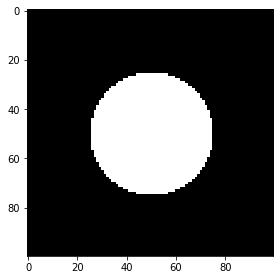

In [ ]:
circ_image = np.zeros((100, 100))
circ_image[circle(50, 50, 25)] = 1
imshow(circ_image);

Kemudian kita buat sebuah kernel (filter) yang akan kita gunakan untuk gambar bulat diatas:

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


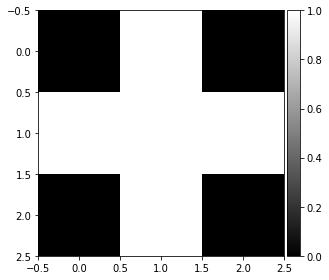

In [ ]:
cross = np.array([[0,1,0],
                  [1,1,1],
                  [0,1,0]])
imshow(cross, cmap = 'gray');

Lalu, kita akan gunakan kernel (filter) cross itu keatas objek bulatan kita:

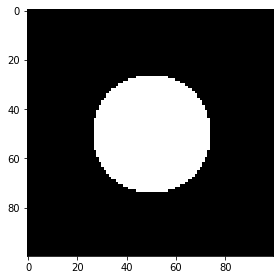

In [ ]:
eroded_circle = erosion(circ_image, cross)
imshow(eroded_circle);

Ada bedanya?

Untuk melihat bedanya, mari kita coba lihat dengan lebih detil:

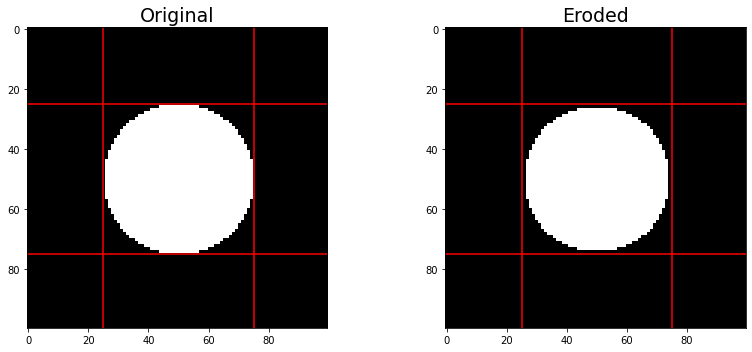

In [ ]:
linecolor = 'red'
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(circ_image, cmap = 'gray');
ax[0].set_title('Original', fontsize = 19)
ax[0].axvline(x = 25, color = linecolor)
ax[0].axvline(x = 75, color = linecolor)
ax[0].axhline(y = 25, color = linecolor)
ax[0].axhline(y = 75, color = linecolor)
ax[1].imshow(eroded_circle, cmap = 'gray');
ax[1].set_title('Eroded', fontsize = 19)
ax[1].axvline(x = 25, color = linecolor)
ax[1].axvline(x = 75, color = linecolor)
ax[1].axhline(y = 25, color = linecolor)
ax[1].axhline(y = 75, color = linecolor)
fig.tight_layout()

Sekarang, apa bedanya?

Kita bisa lihat bahwa objek bulatan kita tersebut terlihat sedikit menyusut ya. 

**Inilah hasil dari melakukan sebuah operasi morfologi yang bernama Erosi (Erosion)**.

Sekarang, coba kita iterasi fungsi erosi tersebut, maka hasilnya akan semakin jelas:

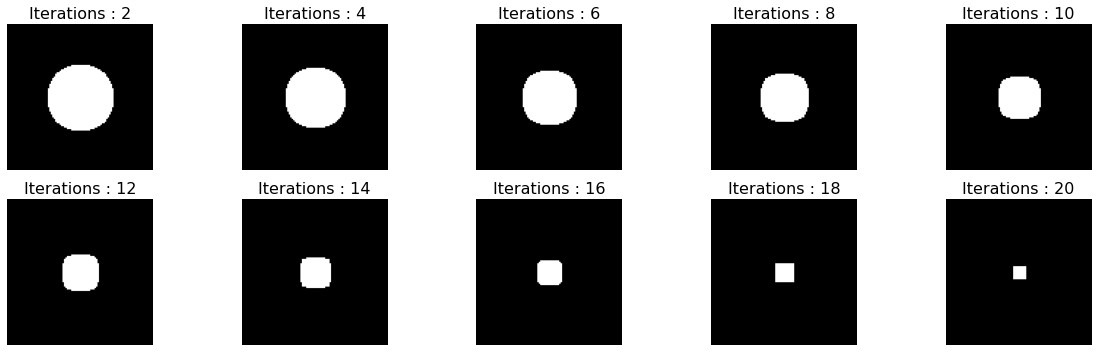

In [ ]:
def multi_erosion(image, kernel, iterations):
    for i in range(iterations):
        image = erosion(image, kernel)
    return image
ites = [2,4,6,8,10,12,14,16,18,20]
fig, ax = plt.subplots(2, 5, figsize=(17, 5))
for n, ax in enumerate(ax.flatten()):
    ax.set_title(f'Iterations : {ites[n]}', fontsize = 16)
    new_circle = multi_erosion(circ_image, cross, ites[n])
    ax.imshow(new_circle, cmap = 'gray');
    ax.axis('off')
fig.tight_layout()

Seperti yang bisa kita lihat, gambar objek bulatan kita semakin menyusut setiap kali iterasi nya.

## **B. Dilasi (Dilation)**

Sama seperti tadi, kita buat dulu objek gambar bulatan nya:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: `draw.circle` is deprecated in favor of `draw.disk`.`draw.circle` will be removed in version 0.19
  


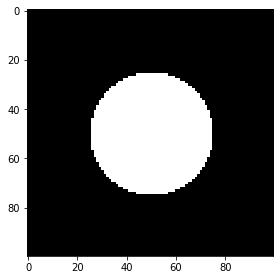

In [ ]:
circ_image = np.zeros((100, 100))
circ_image[circle(50, 50, 25)] = 1
imshow(circ_image);

Kemudian kita gunakan sebuah kernel (filter) untuk digunakan diatas objek bulatan kita:

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


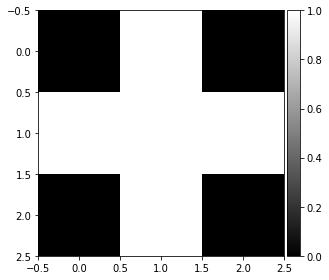

In [ ]:
cross = np.array([[0,1,0],
                  [1,1,1],
                  [0,1,0]])
imshow(cross, cmap = 'gray');

Lalu kita gunakan kernel (filter) tersebut keatas objek kita:

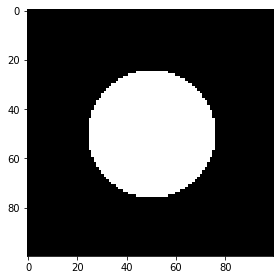

In [ ]:
dilated_circle = dilation(circ_image, cross)
imshow(dilated_circle);

Ada perubahan kira-kira?

Coba kita lihat lebih detil dua gambar tersebut secara berdampingan:

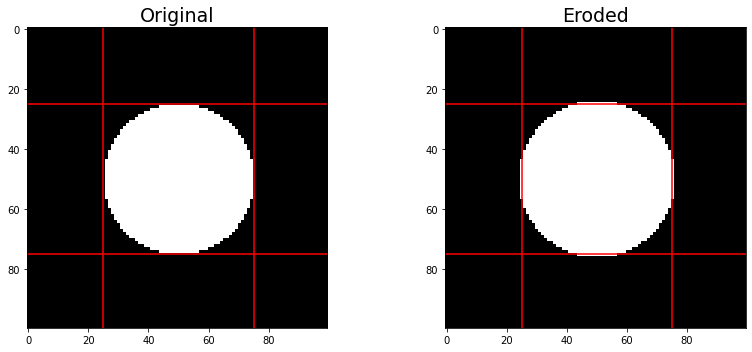

In [ ]:
linecolor = 'red'
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(circ_image, cmap = 'gray');
ax[0].set_title('Original', fontsize = 19)
ax[0].axvline(x = 25, color = linecolor)
ax[0].axvline(x = 75, color = linecolor)
ax[0].axhline(y = 25, color = linecolor)
ax[0].axhline(y = 75, color = linecolor)
ax[1].imshow(dilated_circle, cmap = 'gray');
ax[1].set_title('Eroded', fontsize = 19)
ax[1].axvline(x = 25, color = linecolor)
ax[1].axvline(x = 75, color = linecolor)
ax[1].axhline(y = 25, color = linecolor)
ax[1].axhline(y = 75, color = linecolor)
fig.tight_layout()

Apa yang terjadi?

Jelas terlihat objek kita bertumbuh sedikit ke atas-bawah dan ke kanan-kiri hingga melewati garis merah, sesuai dengan kernel (filter) yang kita ciptakan tadi.

Mari lihat lebih jelas dengan melakukan proses iterasi atas objek kita:

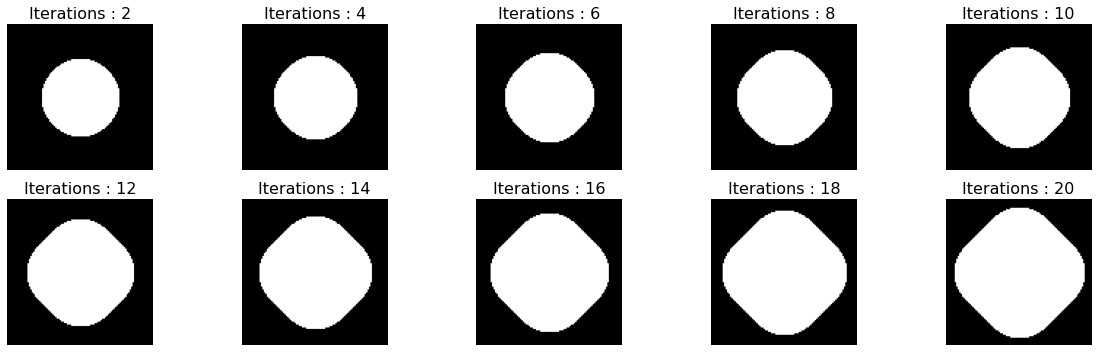

In [ ]:
def multi_dilation(image, kernel, iterations):
    for i in range(iterations):
        image = dilation(image, kernel)
    return image
ites = [2,4,6,8,10,12,14,16,18,20]
fig, ax = plt.subplots(2, 5, figsize=(17, 5))
for n, ax in enumerate(ax.flatten()):
    ax.set_title(f'Iterations : {ites[n]}', fontsize = 16)
    new_circle = multi_dilation(circ_image, cross, ites[n])
    ax.imshow(new_circle, cmap = 'gray');
    ax.axis('off')
fig.tight_layout()

## **C. Aplikasi pada gambar kompleks**

Pertanyaannya adalah, untuk apa sih Erosi dan Dilasi tersebut?

Mari kita coba menggunakan nya pada gambar yang lebih kompleks.

Download gambar tersebut disini: [complex_image](https://drive.google.com/file/d/1n2G7mOjvvrebj6WnPwerGN139jTZfLW8/view?usp=sharing).

In [ ]:
# upload gambar complex_image.png 
# file akan disimpan sesuai dengan nama file yang diunggah
from google.colab import files
file = files.upload()

Saving complex_image.png to complex_image.png


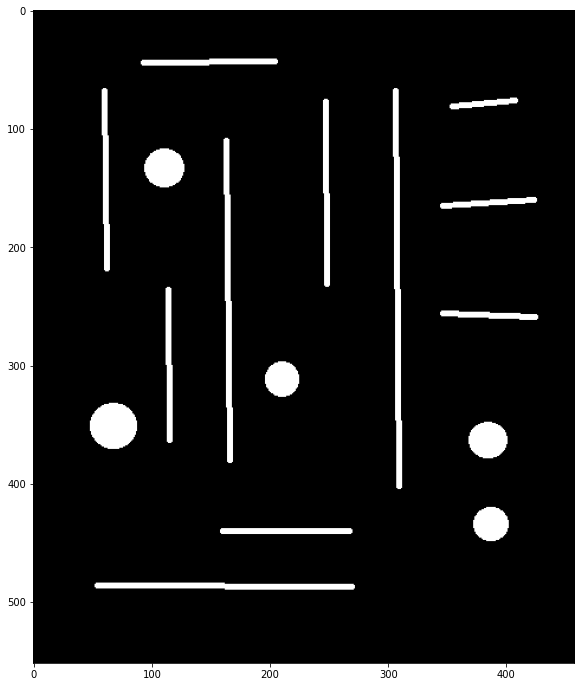

In [ ]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

complex_image = cv.cvtColor(cv.imread('complex_image.png'), cv.COLOR_BGR2GRAY)

plt.figure(figsize = (20,12))
plt.imshow(complex_image, cmap='gray', vmin = 0, vmax = 255)
plt.show()

Gambar complex_image diatas terdiri dari objek garis horizontal, garis vertikal, dan objek gambar bulatan.

Menggunakan Erosi dan Dilasi, kita dapat menampilkan masing-masing dari objek tersebut secara terpisah.

Sebelum itu, kita memerlukan dua buah kernel (filter) lain yaitu h_line dan v_line:

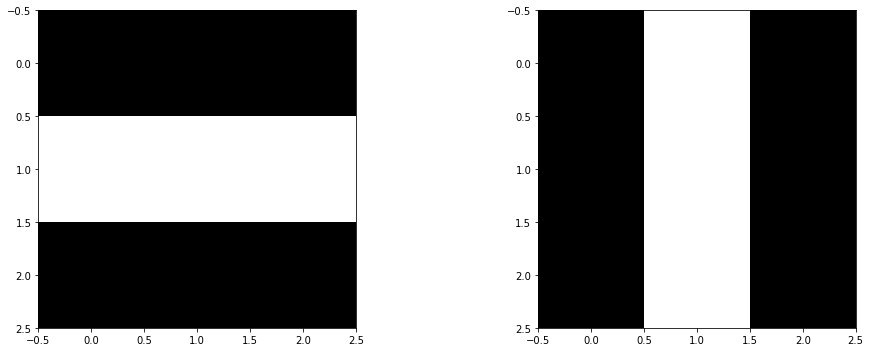

In [ ]:
h_line = np.array([[0,0,0],
                  [1,1,1],
                  [0,0,0]])
v_line = np.array([[0,1,0],
                  [0,1,0],
                  [0,1,0]])
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(h_line, cmap='gray');
ax[1].imshow(v_line, cmap='gray');
fig.tight_layout()

Kemudian, pertama-tama, mari kita tampilkan gambar objek bulatan saja:

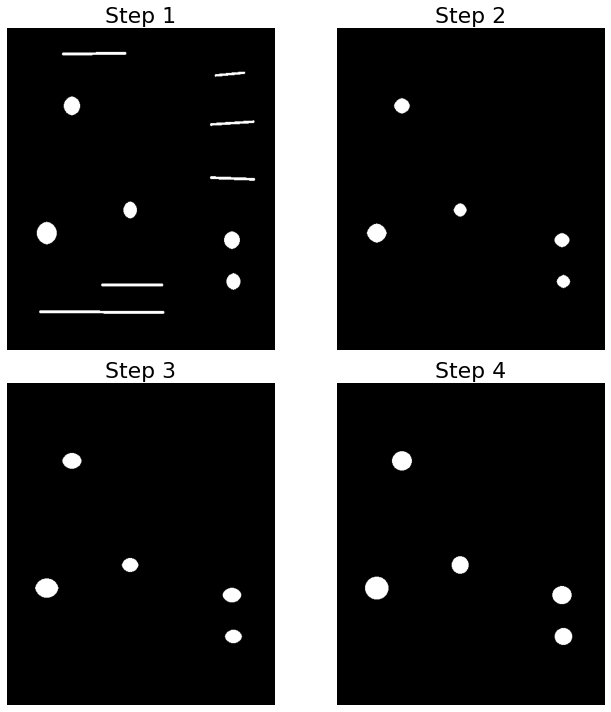

In [ ]:
step_1 = multi_erosion(complex_image, h_line,3)
step_2 = multi_erosion(step_1, v_line,3)
step_3 = multi_dilation(step_2, h_line,3)
step_4 = multi_dilation(step_3, v_line,3)
steps = [step_1, step_2, step_3, step_4]
names = ['Step 1', 'Step 2', 'Step 3', 'Step 4']
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
for n, ax in enumerate(ax.flatten()):
    ax.set_title(f'{names[n]}', fontsize = 22)
    ax.imshow(steps[n], cmap = 'gray');
    ax.axis('off')
fig.tight_layout()

Kemudian, kita juga bisa menampilkan gambar garis horizontal saja:

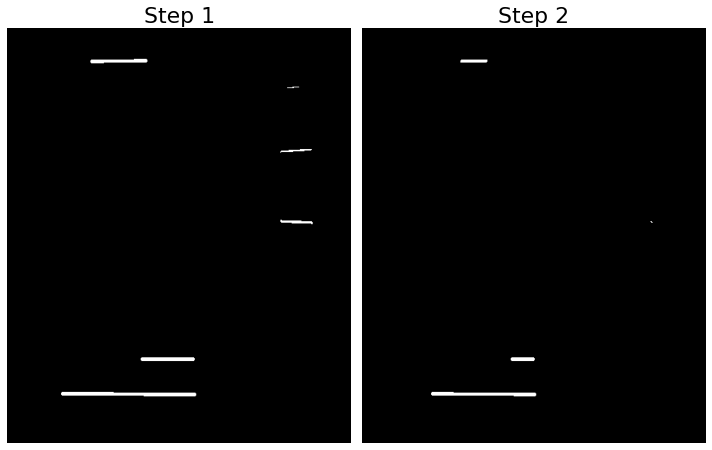

In [ ]:
step_1 = multi_erosion(complex_image, h_line, 20)
step_2 = multi_erosion(step_1, h_line, 20)
steps = [step_1, step_2]
names = ['Step 1', 'Step 2']
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
for n, ax in enumerate(ax.flatten()):
    ax.set_title(f'{names[n]}', fontsize = 22)
    ax.imshow(steps[n], cmap = 'gray');
    ax.axis('off')
fig.tight_layout()

Kemudian, kita bisa hanya menampilkan garis vertikal saja. Untuk garis vertikal ini, kita perlu membuat sebuah kernel (filter) baru bernama long_v_line:

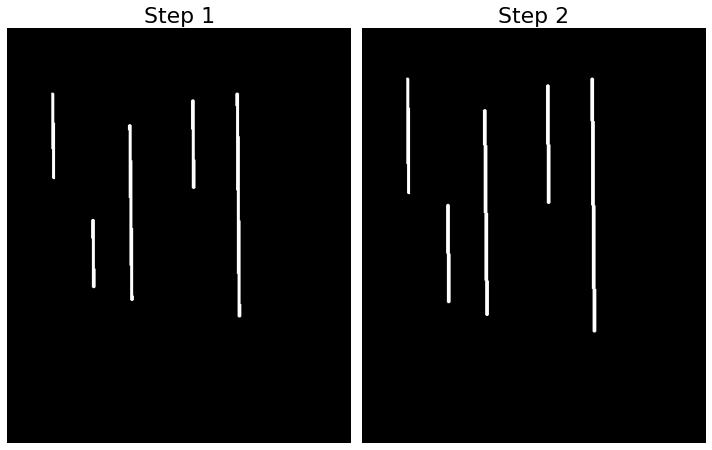

In [ ]:
long_v_line = np.array([[0,1,0],
                        [0,1,0],
                        [0,1,0],
                        [0,1,0],
                        [0,1,0]])

step_1 = multi_erosion(complex_image, long_v_line, 10)
step_2 = multi_dilation(step_1 ,long_v_line, 10)
steps = [step_1, step_2]
names = ['Step 1', 'Step 2']
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
for n, ax in enumerate(ax.flatten()):
    ax.set_title(f'{names[n]}', fontsize = 22)
    ax.imshow(steps[n], cmap = 'gray');
    ax.axis('off')
fig.tight_layout()

Kesimpulan:

Kernel (Filter) Erosi dan Dilasi adalah konsep mendasar untuk memahami ilmu Pengolahan Citra. Memahami konsep ini berarti bisa menjadi kunci kesuksesan Anda dalam dunia Pengolahan Citra, bahkan Computer Vision nantinya.

Sekian

## **Latihan**

Coba lakukan operasi Erosi dan Dilasi pada gambar-gambar yang disediakan.

Bagi Anda dengan angka terakhir NIM nya bernilai Ganjil, maka download [gambar ini](https://drive.google.com/file/d/1n3hU9DtE3gQAysOTJfsh-56mc0TcCVE5/view?usp=sharing).

Dan bagi Anda dengan angka terakhir NIM nya bernilai Genap, maka download [gambar ini](https://drive.google.com/file/d/1n5RZJPmqIVCFb4X-PUgzf_Ta27TrOESk/view?usp=sharing).

Jangan lupa cantumkan jawaban atas pertanyaan-pertanyaan berikut.
Pertanyaan untuk NIM Ganjil:
- 1. Apa yang terjadi pada objek bulatan yang ditembus garis vertikal?
- 2. Apa yang terjadi pada garis horizontal yang ditembus garis vertikal?
- 3. Apa yang terjadi pada garis vertikal yang berada didalam garis bulat?

Pertanyaan untuk NIM Ganda:
- 1. Apa yang terjadi pada objek bulatan yang terserempet garis vertikal maupun garis horizontal di sisi luarnya?
- 2. Apa yang terjadi pada garis horizontal yang menemus objek gambar bulatan?
- 3. Apa yang terjadi pada garis vertikal yang diganggu oleh garis bertanda X?

KIRIM:
> file .ipynb,

> jangan lupa cantumkan jawaban analisis anda!

> ke EMAIL zakiulfahmi.fst@ar-raniry.ac.id dengan format:
Nama Anda_PC_Jumat_LATIHAN_06

Dikumpulkan sebelum pertemuan minggu depan yaitu tanggal 16 Juni 2022, pukul 23.59 WIB!

# **Reference**

- Marleny, F. D. (2021). Pengolahan citra digital menggunakan Python (Vol. 1). CV. Pena Persada.

- https://towardsdatascience.com/introduction-to-image-processing-with-python-dilation-and-erosion-for-beginners-d3a0f29ad72b